In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'nearest'
import pandas as pd

import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [2]:
def plot3d(X, color=None):
    df = pd.DataFrame(X, columns=['x', 'y', 'z'])
    if color is not None:
        df['color'] = color
        fig = px.scatter_3d(df, x='x', y='y', z='z', color=color)
    else:
        fig = px.scatter_3d(df, x='x', y='y', z='z')
    fig.update_traces(marker=dict(size=3, colorscale='Viridis'))
    fig.update_layout(scene=dict(aspectmode='data'))
    fig.show()

# HELLO

 https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

In [3]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

In [4]:
X = make_hello(1000)
X.shape

(1000, 2)

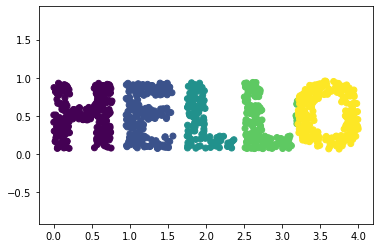

In [5]:
c = np.digitize(X[:,0], np.arange(1,6) * .8)
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.axis('equal');

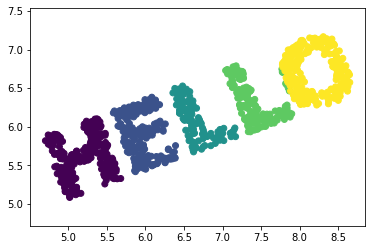

In [6]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X = rotate(X, 20) + 5
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.axis('equal');

In [7]:
# add noise in z-dimension
X = np.concatenate([X, np.random.standard_normal((X.shape[0], 1)) * 0.1], axis=1)

In [8]:
plot3d(X, c)

In [9]:
# rotate in 3D
# C = np.random.standard_normal([3, 3])
C = np.array([[ 0.19636073,  1.86924655, -0.64380463],
       [-1.7068794 , -0.71395222,  0.31761654],
       [ 0.26489417,  0.49072133,  1.59216802]])
S = C @ C.T
e, V = np.linalg.eigh(S)
X = X @ V

In [10]:
plot3d(X, c)

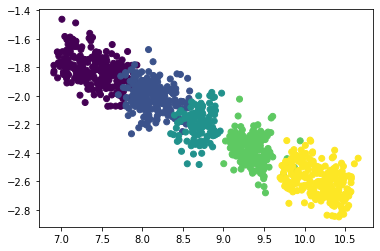

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=c);

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)

In [13]:
print(pca.components_)

[[ 0.84846958 -0.23995865 -0.47171942]
 [ 0.47551265 -0.04566714  0.87852276]]


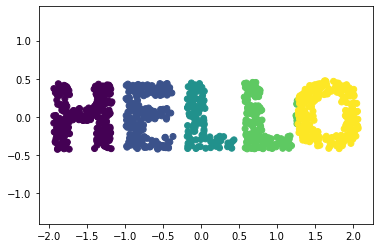

In [14]:
Y = pca.transform(X)
plt.scatter(Y[:, 0], Y[:, 1], c=c)
plt.axis('equal');

In [15]:
Xpca = pca.inverse_transform(Y)

In [16]:
plot3d(Xpca, c)

In [17]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.4 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z =  (np.cos(t) - 1)
    return np.vstack((x, y, z)).T


XS = make_hello_s_curve(make_hello(1000))

plot3d(XS, c)

In [18]:
pcaS = PCA(n_components=2).fit(XS)

In [19]:
print(pcaS.components_)

[[ 0.99894689 -0.02463084 -0.03870957]
 [-0.03812723  0.02368864 -0.99899207]]


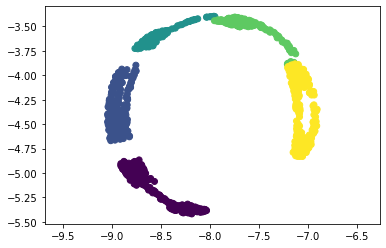

In [20]:
YS = pca.transform(XS)
plt.scatter(YS[:, 0], YS[:, 1], c=c)
plt.axis('equal');

In [21]:
import umap

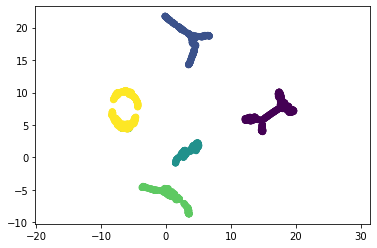

In [22]:
model = umap.UMAP(n_components=2, n_neighbors=20, min_dist=0.1)
X_umap = model.fit_transform(XS)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=c)
plt.axis('equal');

In [23]:
from sklearn.manifold import TSNE
model = TSNE(n_components = 2, perplexity = 30)
X_tsne = model.fit_transform(XS)

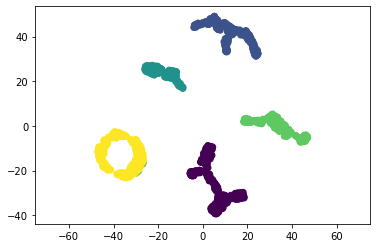

In [24]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=c)
plt.axis('equal');

# Iris

In [25]:
iris = px.data.iris()#.drop('species_id', axis=1)
iris

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145           3  
146           3  
147           3  
148           3  
149           3  

[150 rows x 6 columns]

In [26]:
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.update_traces( marker=dict(size=5, opacity=.5))
fig.show()

In [27]:
X_iris = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
X_iris.shape

(150, 4)

In [28]:
pca = PCA(n_components=2).fit(X_iris)

In [29]:
print(pcaS.components_)

[[ 0.99894689 -0.02463084 -0.03870957]
 [-0.03812723  0.02368864 -0.99899207]]


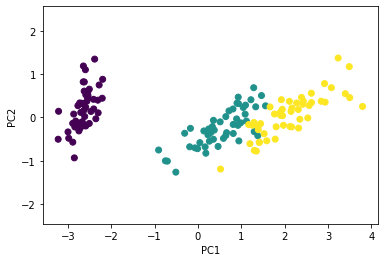

In [30]:
Y_iris = pca.transform(X_iris)
plt.scatter(Y_iris[:, 0], Y_iris[:, 1], c=iris['species_id'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis('equal');

## UMAP

In [34]:
reducer = umap.UMAP()
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X_iris)

In [35]:
embedding = reducer.fit_transform(X_scaled)
embedding.shape

(150, 2)

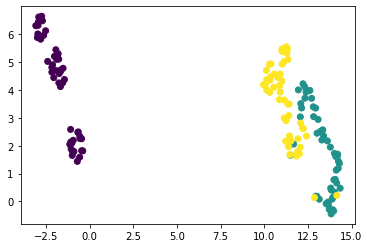

In [36]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=iris['species_id'])

# Digits

https://umap-learn.readthedocs.io/en/latest/basic_usage.html#digits-data

In [37]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

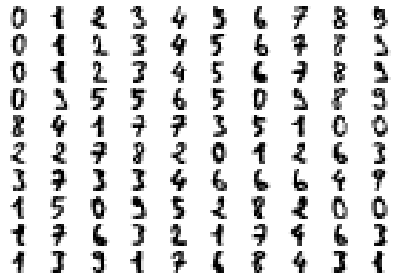

In [38]:
fig, ax_array = plt.subplots(10, 10)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [39]:
digits.data.shape

(1797, 64)

In [40]:
Y_digits = PCA(n_components=2).fit_transform(digits.data)
Y_digits.shape

(1797, 2)

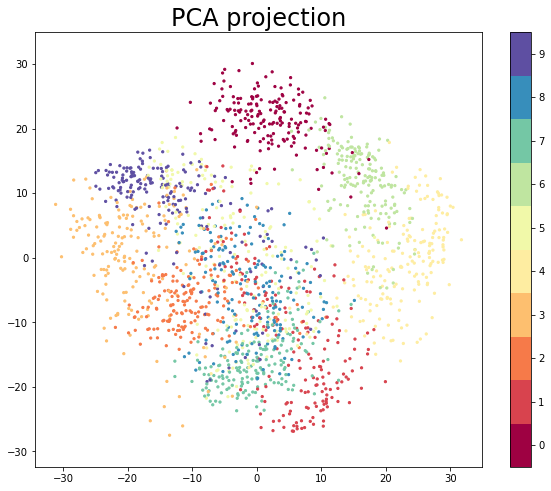

In [41]:
plt.figure(figsize=(10,8))
plt.scatter(Y_digits[:, 0], Y_digits[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('PCA projection', fontsize=24);

In [42]:
reducer = umap.UMAP()
reducer.fit(digits.data)

UMAP()

In [43]:
embedding = reducer.transform(digits.data)
embedding.shape

(1797, 2)

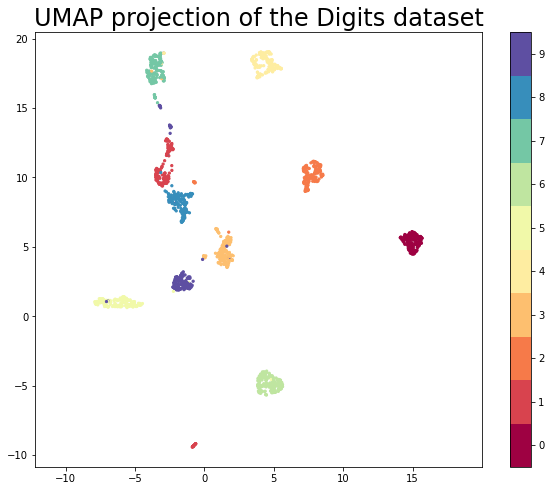

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);